# Task 1: Data Loading and Preprocessing

###### Submitted By : Ashok Deb

### Data Loading 

In [1]:
# importing pandas
import pandas as pd

In [2]:
# Reading the CSV file
df = pd.read_csv('Dataset.csv')
df.head()

,Sno,job,education,gender,English speaker
0,1,manage,15,male,no
1,2,admin,16,male,no
2,3,admin,12,female,no
3,4,admin,8,female,no
4,5,admin,15,male,no


In [3]:
# check for total number of rows and columns
df.shape

(474, 5)

### Modifications on the dataset 

In [4]:
# Removing Sno since it is just index column , hence useless for our analysis
df.drop(columns=['Sno'] , inplace = True) 

### Handling missing values

Need to handle missing values which might reduce accuracy of predictions.

In [5]:
# count the number of missing values in each column
df.isnull().sum()

job                0
education          0
gender             0
English speaker    0
dtype: int64

### Removing duplicate rows 

Need to handle duplicates, otherwise it would create unnecessary overhead for the ML model.

In [6]:
# Check for number of duplicate rows
df.duplicated().sum()

434

In [7]:
# delete all duplicate rows using the command
df.drop_duplicates(subset=None, inplace=True)

In [8]:
df.shape

(40, 4)

Duplicate rows are deleted and only unique rows are remaining

### Few rows of the cleaned dataset 

In [9]:
df.head()

,job,education,gender,English speaker
0,manage,15,male,no
1,admin,16,male,no
2,admin,12,female,no
3,admin,8,female,no
4,admin,15,male,no


# Task 2: Exploratory Data Analysis

### Visualizations to show various distributions 

In [10]:
# importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Used seaborn to plot the various distribution using countplot

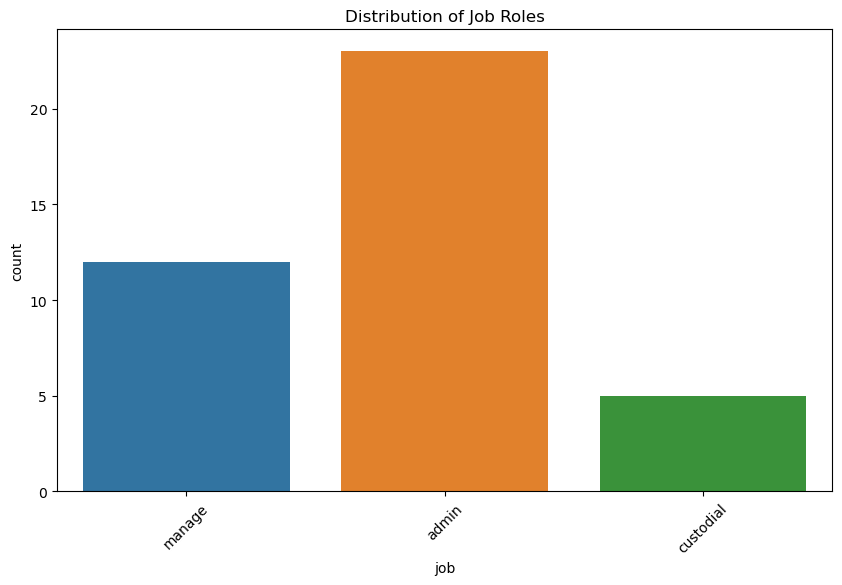

In [11]:
# Visualizing the distribution of job roles using countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Job Roles')
plt.show()

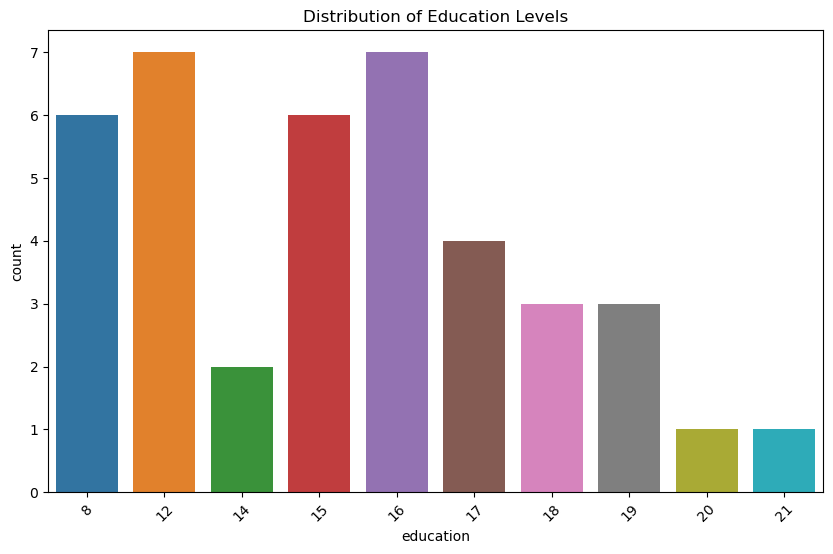

In [12]:
# Visualizing the distribution of education levels using countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Education Levels')
plt.show()

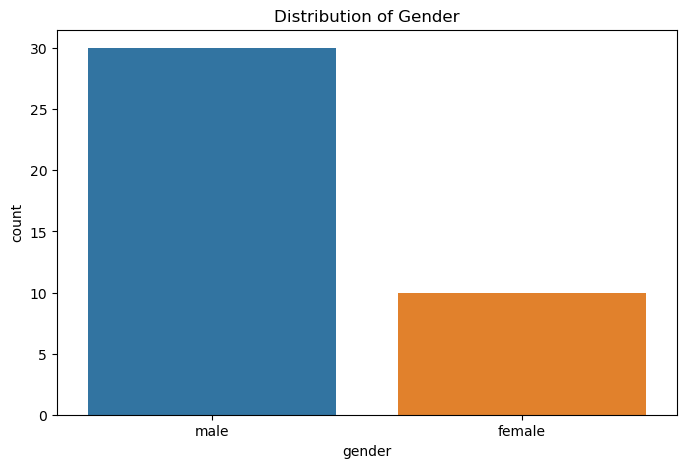

In [13]:
# Visualizing the distribution of gender using countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.show()

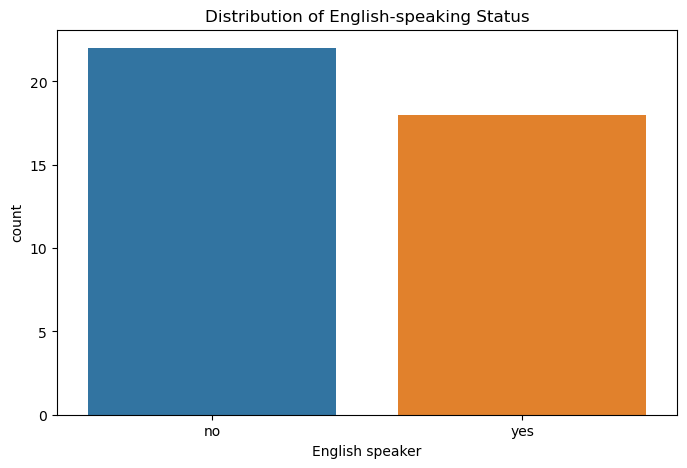

In [14]:
# Visualizing the distribution of English-speaking groups using countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='English speaker', data=df)
plt.title('Distribution of English-speaking Status')
plt.show()

###  Calculating percentage of individuals 

find out the count of the individuals of a particular category and divide it by total len of the dataframe
value_counts() method returns an object containing unique individuals and their counts
divide it by total length to get percentage

In [15]:
# count of all types in a particular category
df['job'].value_counts()

admin        23
manage       12
custodial     5
Name: job, dtype: int64

In [16]:
# Calculating the percentage of individuals belonging to various job roles
job_role_percentage = (df['job'].value_counts() / len(df)) * 100
print("Percentage of Individuals Belonging to Different Job Roles:")
print(job_role_percentage)

Percentage of Individuals Belonging to Different Job Roles:
admin        57.5
manage       30.0
custodial    12.5
Name: job, dtype: float64


In [17]:
# Calculating the percentage of individuals having different education levels
education_percentage = (df['education'].value_counts() / len(df)) * 100
print("Percentage of Individuals having Different Education Levels:")
print(education_percentage)

Percentage of Individuals having Different Education Levels:
16    17.5
12    17.5
15    15.0
8     15.0
17    10.0
19     7.5
18     7.5
14     5.0
20     2.5
21     2.5
Name: education, dtype: float64


In [18]:
# Calculating the percentage of individuals belonging to different gender groups
gender_percentage = (df['gender'].value_counts() / len(df)) * 100
print("Percentage of Individuals Belonging to Different Gender Groups:")
print(gender_percentage)

Percentage of Individuals Belonging to Different Gender Groups:
male      75.0
female    25.0
Name: gender, dtype: float64


In [19]:
# Calculating the percentage of individuals belonging to different English-speaking groups
english_speaking_percentage = (df['English speaker'].value_counts() / len(df)) * 100
print("Percentage of Individuals Belonging to Different English-speaking Groups:")
print(english_speaking_percentage)

Percentage of Individuals Belonging to Different English-speaking Groups:
no     55.0
yes    45.0
Name: English speaker, dtype: float64


# Task 3: Gender and English Speaker Analysis

### Average education levels of each gender group 

Group by all columns in terms of 'gender' column and then calculate the mean of required column 'education' which gives us the avg education level of each groups.

In [20]:
#  grouped together all genders using groupby
grouped = df.groupby('gender')
#  find out the mean of the education_levels of each gender
avg_education_by_gender = grouped['education'].mean()
print("Average Education Level by Gender:")
print(avg_education_by_gender)

Average Education Level by Gender:
gender
female    13.5
male      14.9
Name: education, dtype: float64


### Comparing the distribution of job roles among different gender groups using a Stacked Bar Chart 

Stacked bar chart will be given by a pivot table where gender is used as row and job roles as col since we need the distribution of diff job roles in terms of gender. Create pivot table and plot the graph using matplotlib. 

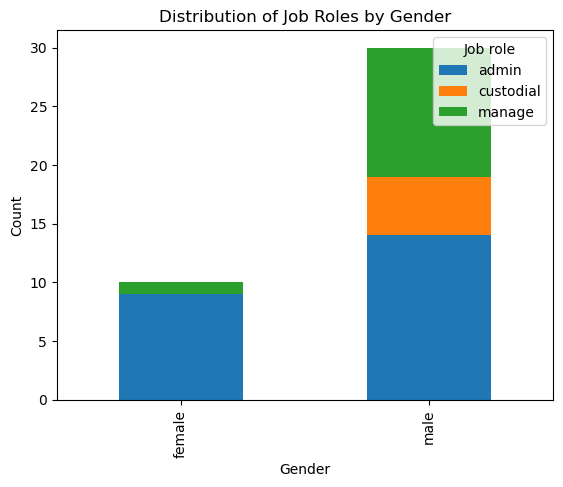

In [21]:
# Creating a pivot table for counting job roles by gender

# 'gender' is used as the row of the pivot table and 'job' as the col
# aggfunc is set to be size since we will count the occ of all the comb of gender and job
# empty spaces are filled with zero as fill_value = 0
pivot_table = df.pivot_table(index='gender', columns='job', aggfunc='size', fill_value=0)

# Plotting a stacked bar chart
pivot_table.plot(kind='bar', stacked=True)
plt.title('Distribution of Job Roles by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Job role', loc='upper right')
plt.show()

###  Histogram to show the distribution of education levels among English speaking and Non-English speaking Groups 

divide into subsets of datframe in terms of english speaking status and then plot the 'education' col of each subset esing histogram.

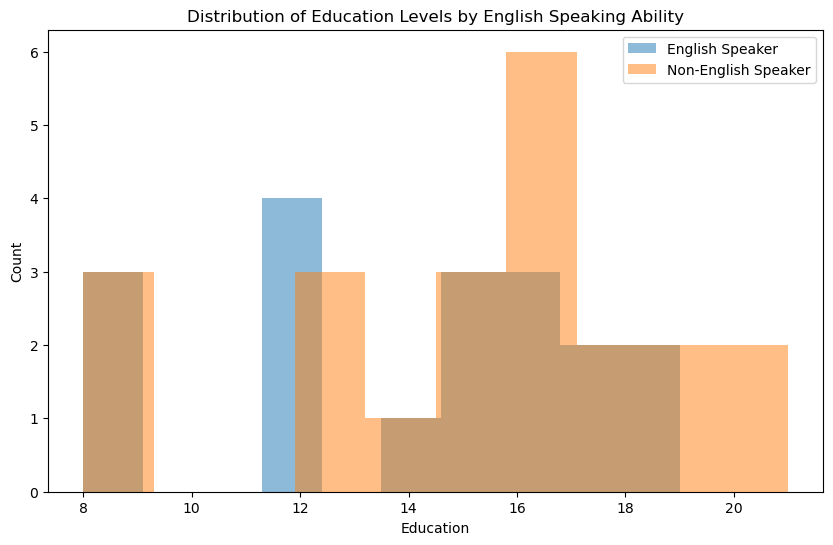

In [22]:
# Creating histograms for education levels among English-speaking and non-English-speaking groups
plt.figure(figsize=(10, 6))  # 10 units wide and 6 units tall

# find out the english speaking and non english speaking subset
eng_speaker_grp = df[df['English speaker'] == 'yes']
non_eng_speaker_grp = df[df['English speaker'] == 'no']
# Create histogram for 'education' within the subset
# Plotting the hist using plt.hist() func and setting transparency to be 0.5 and no. of intervals tobe 10
plt.hist(eng_speaker_grp['education'], alpha=0.5, label='English Speaker', bins=10)
plt.hist(non_eng_speaker_grp['education'], alpha=0.5, label='Non-English Speaker', bins=10)

plt.title('Distribution of Education Levels by English Speaking Ability')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend()
plt.show()

# Task 4: Predictive Modeling

### Encoding categorical variables

One hot encode categorical data so that it is in numerical format. Convert categorical columns into binary columns using pandas function pd.get_dummies. Drop the first category within each categorical column after encoding to prevent multicollinearity by setting drop_first as True  

In [23]:
# dataframe with one hot encoded categorical data
# One col dropped from each category to avoid multicolinearity
one_hot_encoded_data = pd.get_dummies(df, columns = ['job', 'English speaker','gender'], drop_first=True)
one_hot_encoded_data.head()

,education,job_custodial,job_manage,English speaker_yes,gender_male
0,15,0,1,0,1
1,16,0,0,0,1
2,12,0,0,0,0
3,8,0,0,0,0
4,15,0,0,0,1


In [24]:
X = one_hot_encoded_data.iloc[: , :-1]  # Independent variables dataframe                              
y = one_hot_encoded_data.iloc[:,-1]     # Dependent variable dataframe

In [25]:
X.shape

(40, 4)

In [26]:
y.shape

(40,)

In [27]:
X.head()

,education,job_custodial,job_manage,English speaker_yes
0,15,0,1,0
1,16,0,0,0
2,12,0,0,0
3,8,0,0,0
4,15,0,0,0


###  Splitting the dataset into the Training  and Test set 

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 1)

### Classification Model (Random Forest Classifier) 

Random Forest classifier as the classification model to predict gender. Training it with train dataset and making predictions using test dataset and then compare  the predicted with known results through various metrics.  

In [29]:
# random forest classifier algo
from sklearn.ensemble import RandomForestClassifier
# set no. of trees to be 10
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [30]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

### Evauation of the model 

In [31]:
#evaluating the model performance using various metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.625
Precision: 0.625
Recall: 1.0
F1 Score: 0.7692307692307693


### Identifying the most influential features 

Use permutation importance technique to evaluate the importance of each features.calculate feature importance scores and convert it into dataframe with cols as associated features and their score. Sort that out in decreasing order and then plot it visually using barplot.

In [32]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
# Calculate feature importance scores
feature_importances = classifier.feature_importances_

In [33]:
feature_importances

array([0.61777502, 0.11980803, 0.07234546, 0.19007148])

Feature Importance Scores:
               Feature  Importance
0            education    0.617775
3  English speaker_yes    0.190071
1        job_custodial    0.119808
2           job_manage    0.072345


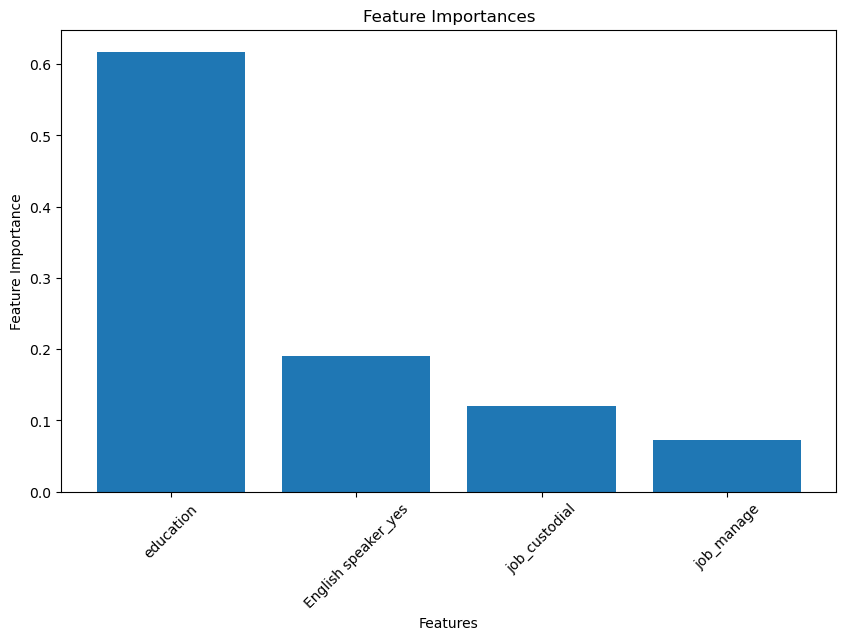

In [34]:

# DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

#  DataFrame sorted by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importance Scores:")
print(importance_df)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_df)), importance_df['Importance'], tick_label=importance_df['Feature'])
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.xticks(rotation=45)
plt.show()

### ROC Curve and AUC score of the model

AUC Score: 0.6


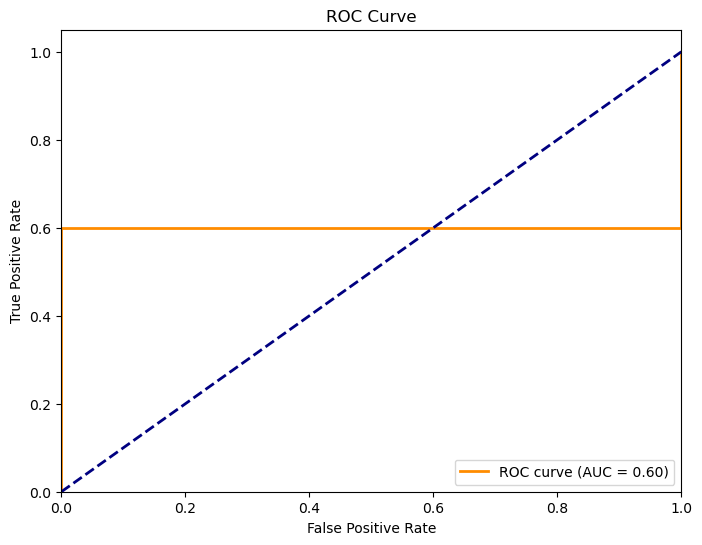

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

#  probabilities preicted for the positive class
y_probs = classifier.predict_proba(X_test)[:, 1]

#  ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)    # fpr --> false positive rate , tpr--> True positive rate

#  AUC score
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)

# Visualizing ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Summary 

 The model has an accuracy of 62.5%, indicating that it correctly predicts gender for 62.5% of the individuals in the dataset.
 The most important feature is 'education' with a score of 0.6178, suggesting that education level has the highest impact on   predicting gender.It could also imply that certain education levels are associated with specific genders in the dataset.
 